In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import os
from PIL import Image
%matplotlib inline

In [11]:
import requests
from io import BytesIO
import six.moves.urllib as urllib

In [3]:
os.chdir('./../00 Insumos/01 PP/')
os.listdir()

['all_features_imagenes.csv',
 'coordenadas.csv',
 'data_aplicacion.csv',
 'HLF.csv',
 'imagenes_sinOD.csv',
 'LLF.csv',
 'nans.csv',
 'new_features_imagenes.csv',
 'numeros_id.csv',
 'OD.csv',
 'PP2.dat',
 'PP2_votes.csv']

In [4]:
coord = pd.read_csv('coordenadas.csv')
HLF = pd.read_csv('HLF.csv')
LLF = pd.read_csv('LLF.csv')
nans = pd.read_csv('nans.csv')
num = pd.read_csv('numeros_id.csv')


df = num.merge(nans, on='ID')
df = df.merge(HLF, on='ID')

# .drop(columns=['Unnamed: 0'])
# coord.to_csv('numeros_id.csv', index=False)

In [5]:
df['Cars'] = (df['Car_N'] + df['Car_S'])/2

In [12]:
def show_img(img_id = '513da00ffdc9f035870088ac'):
    url_base = 'http://wekun.ing.puc.cl/static/img/'
    url = url_base + img_id + '.jpg'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    DEST_PATH = 'C:/Users/Tom/Desktop/Errores/'
#     plt.imshow(img)
    return img

## Histograma

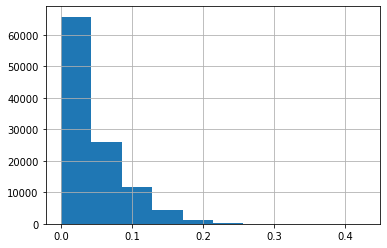

In [7]:
df.loc[(df.NA != 1) &
       (df.Cars != 0),
       :].Cars.hist()

Text(0.5, 0, 'Porcentaje')

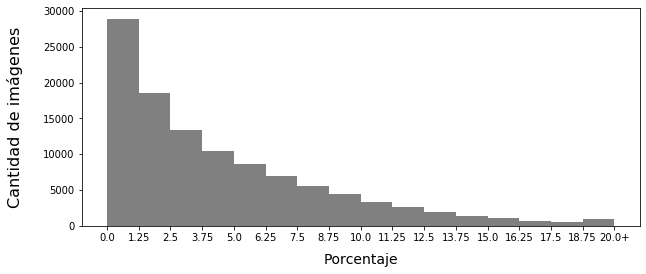

In [55]:
data = df.loc[(df.NA != 1) &
       (df.Cars != 0),
       :].Cars.values #(features['Car_S']!=0)
# data = data * 100 + 1
bins = np.arange(0,0.21,0.0125)
# plt.figure(figsize=[10,4])
fig, ax = plt.subplots(figsize=[10,4])
_, bins, patches = plt.hist(np.clip(data, bins[0], bins[-1]), bins=bins,color=['grey'])
#                             normed=1)  # normed is deprecated; replace with density
#                             density=True,
#                             color=['Lightgrey'],
#                             rwidth = 0.9)

lmda = 1/0.012173
# N = features.sort_values('Car_N',ascending=False).loc[:,['Car_N']].shape[0]
X2 = np.arange(0,0.1,0.01)
Y2 = lmda * np.exp(-lmda*(X2))
# plt.plot(X2,Y2)
# plt.ylim([0,80000])


xlabels = [str(round(i,2)) for i in (bins[0:]*100).tolist()]
xlabels[-1] += '+'

N_labels = len(xlabels)
# plt.xlim([0, 80])
plt.xticks(np.arange(N_labels)/80)
ax.set_xticklabels(xlabels)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# # plt.yticks([])
# plt.title('')

plt.ylabel("Cantidad de imágenes", fontsize=16, labelpad=20)
plt.xlabel("Porcentaje", fontsize=14, labelpad=10)

In [37]:
aux = df.loc[(df.NA != 1) &
       (df.Cars != 0),
       :].sort_values('Cars').loc[:,['ID','Cars']]

### Percentil 99

In [59]:
aux.iloc[-00:,]

,ID,Cars
67309,513d57f3fdc9f0358700325d,0.196341
48934,513d7aa0fdc9f035870068d4,0.196365
65819,513cbd30fdc9f0358700106b,0.196394
9667,513d9ac3fdc9f035870077c5,0.196423
60274,50f42bb5fdc9f065f0001680,0.196458
...,...,...
107562,513f2de2fdc9f0358700db01,0.371030
27758,513d6124fdc9f03587003de8,0.386490
43234,50f5e566fdc9f065f000684a,0.404252
83820,50f5ead4fdc9f065f0007db8,0.426074


In [48]:
lista_imagenes = aux.iloc[-200:-100,0].tolist()
lista_imagenes

['51414668fdc9f049260067e2',
 '513f3117fdc9f0358700df5e',
 '50f44869fdc9f065f0004086',
 '51421a48fdc9f0492600831a',
 '513d611afdc9f03587003dd8',
 '513d7a98fdc9f035870068b4',
 '513f29ccfdc9f0358700d423',
 '51421c88fdc9f04926008587',
 '514134cefdc9f049260047bf',
 '513f2a95fdc9f0358700d56e',
 '50f42bbbfdc9f065f00016da',
 '513d9d80fdc9f035870080c8',
 '513924be818ede1296001005',
 '50f5ed5bfdc9f065f0008ca4',
 '51409486fdc9f049260008a8',
 '513d681efdc9f0358700426b',
 '50f5ead4fdc9f065f0007db1',
 '50f60c44beb2fed9100001bd',
 '513d7e87fdc9f03587007415',
 '51421c91fdc9f04926008593',
 '513f2b65fdc9f0358700d6be',
 '513f32befdc9f0358700e0ce',
 '51414e1cfdc9f0492600776e',
 '51409a86fdc9f04926000f67',
 '51421a6afdc9f0492600833a',
 '51409470fdc9f04926000893',
 '514219edfdc9f049260082bb',
 '514099a5fdc9f04926000e3f',
 '50f439f6fdc9f065f0002de3',
 '513d7f58fdc9f035870075be',
 '50f5ead1fdc9f065f0007d7b',
 '513d3458fdc9f03587002a11',
 '51421785fdc9f04926008035',
 '50f43badfdc9f065f000331a',
 '513d5db8fdc9

In [49]:
opener = urllib.request.URLopener()
url_base = 'http://wekun.ing.puc.cl/static/img/'
# img_id = '513da00ffdc9f035870088ac'
DEST_PATH = 'C:/Users/Tom/Desktop/Tesis/Cars/'
for img in lista_imagenes:
    opener.retrieve(url_base + img + '.jpg', DEST_PATH + img + '.jpg')
    time.sleep(1)

In [16]:
url_base = 'http://wekun.ing.puc.cl/static/img/'
  
sorted_car_n = features.sort_values('Bicyclist_N',ascending=False).loc[:,['ID']]
sorted_car_n.reset_index(inplace=True, drop=True)

for img_id in sorted_car_n.loc[100:106,'ID'].to_list():
    url = url_base + img_id + '.jpg'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.axis('off')

(109357, 29)

### Percentil 75

In [19]:
# aux = df.loc[(df.NA != 1) &
#        (df.Car2 != 0),
#        :].sort_values('Cars')
n = 75
perc = int(aux.shape[0]*n/100)
aux.iloc[perc:perc+5,:]
# .Car_N.sort_values('Car_N')
# .describe()
# .to_latex()

,ID,numero,folder,NA,Bicyclist_N,Bicyclist_S,Building_N,Building_S,Car_N,Car_S,...,Road_S,SignSymbol_N,SignSymbol_S,Sky_N,Sky_S,Tree_N,Tree_S,Unlabelled_N,Unlabelled_S,Cars
47492,513d5d57fdc9f03587003897,7497.0,3,0.0,0.0,0.002496,0.400882,0.229272,0.000000,0.131851,...,0.256540,0.012526,0.014276,0.378955,0.000327,0.132550,0.066957,0.0,0.0,0.065925
58892,51415152fdc9f04926007f6f,18897.0,3,0.0,0.0,0.002041,0.259864,0.083507,0.001866,0.129984,...,0.514561,0.032260,0.008969,0.199543,0.000257,0.496577,0.027268,0.0,0.0,0.065925
5306,50f6166cbeb2fed910000807,5307.0,1,0.0,0.0,0.000303,0.006205,0.025997,0.005458,0.126392,...,0.371409,0.038045,0.014649,0.000000,0.000000,0.887802,0.180754,0.0,0.0,0.065925
107936,51408fc9fdc9f04926000172,8005.0,6,0.0,0.0,0.000035,0.009144,0.009155,0.000956,0.130906,...,0.581530,0.002438,0.002519,0.015768,0.000000,0.952601,0.035456,0.0,0.0,0.065931
55930,5140d2c4fdc9f04926003329,15935.0,3,0.0,0.0,0.000000,0.041217,0.143187,0.000000,0.131862,...,0.398001,0.000000,0.002659,0.068112,0.009027,0.857163,0.048798,0.0,0.0,0.065931


### Percentil 50

In [37]:
aux = df.loc[(df.NA != 1) &
       (df.Car_N != 0),
       :].sort_values('Car_N')
aux.iloc[39628:39631,:]
# .Car_N.sort_values('Car_N')
# .describe()
# .to_latex()

,ID,numero,folder,NA,Bicyclist_N,Bicyclist_S,Building_N,Building_S,Car_N,Car_S,...,Road_N,Road_S,SignSymbol_N,SignSymbol_S,Sky_N,Sky_S,Tree_N,Tree_S,Unlabelled_N,Unlabelled_S
62925,50f56361fdc9f065f0005cff,2932.0,4,0.0,0.000723,0.000863,0.121902,0.365718,0.004035,0.063913,...,0.033508,0.217609,0.008502,0.012514,0.087776,0.070445,0.731774,0.004642,0.0,0.0
71225,513e1f41fdc9f03587009e9d,11232.0,4,0.0,0.000000,0.001831,0.121389,0.268495,0.004035,0.038593,...,0.000000,0.052822,0.007313,0.063155,0.002974,0.000000,0.856276,0.053883,0.0,0.0
104461,513d6956fdc9f035870046c1,4530.0,6,0.0,0.000000,0.039269,0.675395,0.208150,0.004035,0.150955,...,0.000012,0.415834,0.041357,0.036412,0.076824,0.000688,0.048588,0.045113,0.0,0.0


### Percentil 25

In [40]:
aux = df.loc[(df.NA != 1) &
       (df.Car_N != 0),
       :].sort_values('Car_N')
aux.iloc[19813:19816,:]

,ID,numero,folder,NA,Bicyclist_N,Bicyclist_S,Building_N,Building_S,Car_N,Car_S,...,Road_N,Road_S,SignSymbol_N,SignSymbol_S,Sky_N,Sky_S,Tree_N,Tree_S,Unlabelled_N,Unlabelled_S
6202,513cc851fdc9f03587001b1b,6203.0,1,0.0,0.000000,0.000000,0.031560,0.059155,0.000875,0.021332,...,0.0,0.564724,0.002892,0.024469,0.559791,0.027000,0.376214,0.088697,0.0,0.0
26813,513d2f84fdc9f03587002667,6817.0,2,0.0,0.000000,0.000198,0.009599,0.128235,0.000875,0.009785,...,0.0,0.380903,0.025239,0.012456,0.000000,0.000233,0.939422,0.303227,0.0,0.0
50605,513e1a94fdc9f03587009250,10610.0,3,0.0,0.000711,0.000082,0.120211,0.114531,0.000875,0.134475,...,0.0,0.357495,0.014672,0.011255,0.289453,0.000000,0.498735,0.010473,0.0,0.0


In [43]:
# aux.iloc[75290:75295,[0,1,2,3,8]]

In [ ]:
aux.hist().plot()

In [41]:
79258/4*3

59443.5

In [14]:
# '50f60b88beb2fed910000009',
#         '50f5ebc9fdc9f065f0008535',
#         '50f5eba3fdc9f065f00083ae',
#         '50f5e708fdc9f065f0006fb3',
#         '50f5e566fdc9f065f0006856',
#         '50f5e5d9fdc9f065f0006ac9',
## Percentil 75
lista = ['50f43b8cfdc9f065f00031c1',
        '513cbfb8fdc9f035870012e1',
        '513e5e1ffdc9f0358700af9e']

### Percentil 90
# lista = ['513d33d3fdc9f035870029b0',
#         '513d9a98fdc9f03587007726',
#         '5185d409fdc9f03fd5001369']

### Percentil 99
# lista = ['50e73276d7c3df413b000e3f',
#         '50f5e565fdc9f065f0006820',
#         '50f5eba3fdc9f065f00083ae']
aux[(aux['ID'].isin(lista))]

,ID,numero,folder,NA,Bicyclist_N,Bicyclist_S,Building_N,Building_S,Car_N,Car_S,...,Road_N,Road_S,SignSymbol_N,SignSymbol_S,Sky_N,Sky_S,Tree_N,Tree_S,Unlabelled_N,Unlabelled_S
31819,513e5e1ffdc9f0358700af9e,11823.0,2,0.0,0.000117,0.000420,0.068089,0.016701,0.013774,0.010322,...,0.000000,0.400940,0.071926,0.007079,0.224770,0.000023,0.563814,0.113085,0.0,0.0
5866,513cbfb8fdc9f035870012e1,5867.0,1,0.0,0.000000,0.008922,0.182550,0.136994,0.013774,0.023781,...,0.000933,0.413921,0.016247,0.012281,0.582918,0.000058,0.167295,0.062875,0.0,0.0
81233,50f43b8cfdc9f065f00031c1,1271.0,5,0.0,0.000023,0.004910,0.096885,0.013401,0.013774,0.030545,...,0.000058,0.658833,0.039094,0.018241,0.370383,0.001586,0.421175,0.148412,0.0,0.0


In [5]:
os.chdir('./../../09 Outputs/Error Segnet/')
os.listdir()

['P075_01.38', 'P090_03.29', 'P100_47.37']

In [6]:
os.chdir('./../../09 Outputs/Error Segnet/P100_47.37')
path=os.listdir()

['50e73276d7c3df413b000e3f.jpg',
 '50e73276d7c3df413b000e3f.png',
 '50f56122fdc9f065f000545e.jpg',
 '50f56122fdc9f065f000545e.png',
 '50f5e565fdc9f065f0006820.jpg',
 '50f5e565fdc9f065f0006820.png',
 '50f5e566fdc9f065f0006856.jpg',
 '50f5e566fdc9f065f0006856.png',
 '50f5e5d9fdc9f065f0006ac9.jpg',
 '50f5e5d9fdc9f065f0006ac9.png',
 '50f5e708fdc9f065f0006fb3.jpg',
 '50f5e708fdc9f065f0006fb3.png',
 '50f5eba3fdc9f065f00083ae.jpg',
 '50f5eba3fdc9f065f00083ae.png',
 '50f5ebc9fdc9f065f0008535.jpg',
 '50f5ebc9fdc9f065f0008535.png',
 '50f60b88beb2fed910000009.jpg',
 '50f60b88beb2fed910000009.png',
 '50f60b92beb2fed9100000b8.jpg',
 '50f60b92beb2fed9100000b8.png',
 '5140c8effdc9f049260023b2.jpg',
 '5140c8effdc9f049260023b2.png',
 '51414ba0fdc9f04926007121.jpg',
 '51414ba0fdc9f04926007121.png',
 '51414bbefdc9f04926007167.jpg',
 '51414bbefdc9f04926007167.png']

(-0.5, 479.5, 359.5, -0.5)

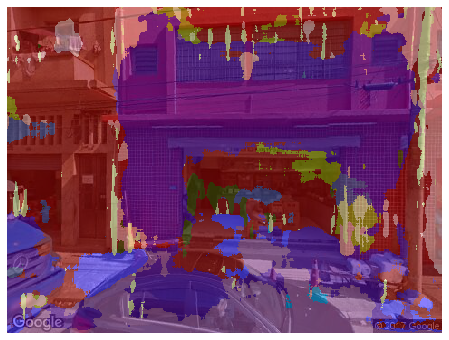

In [18]:
ID = '50f5e566fdc9f065f0006856'
img = Image.open(ID + '.jpg')
seg = Image.open(ID + '.png')

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.imshow(seg, alpha=0.6)

plt.axis('off')